Dataset shape: (225954, 17)

First few rows of the dataset:
        ID  innings  overs  ballnumber       batter          bowler  \
0  1312200        1      0           1  YBK Jaiswal  Mohammed Shami   
1  1312200        1      0           2  YBK Jaiswal  Mohammed Shami   
2  1312200        1      0           3   JC Buttler  Mohammed Shami   
3  1312200        1      0           4  YBK Jaiswal  Mohammed Shami   
4  1312200        1      0           5  YBK Jaiswal  Mohammed Shami   

   non-striker extra_type  batsman_run  extras_run  total_run  non_boundary  \
0   JC Buttler        NaN            0           0          0             0   
1   JC Buttler    legbyes            0           1          1             0   
2  YBK Jaiswal        NaN            1           0          1             0   
3   JC Buttler        NaN            0           0          0             0   
4   JC Buttler        NaN            0           0          0             0   

   isWicketDelivery player_out kind fi

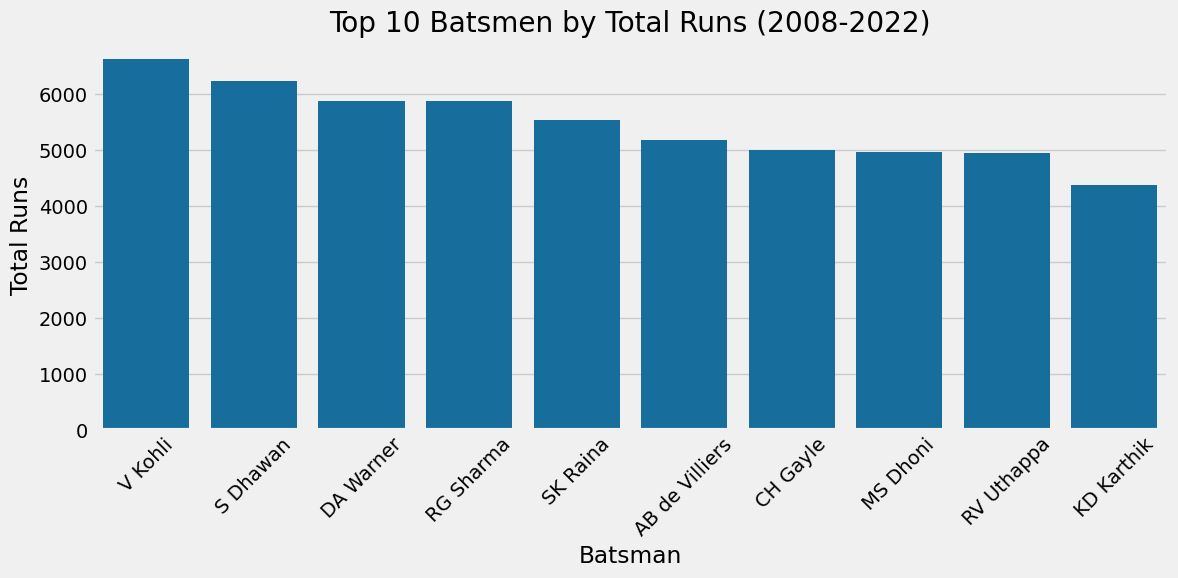

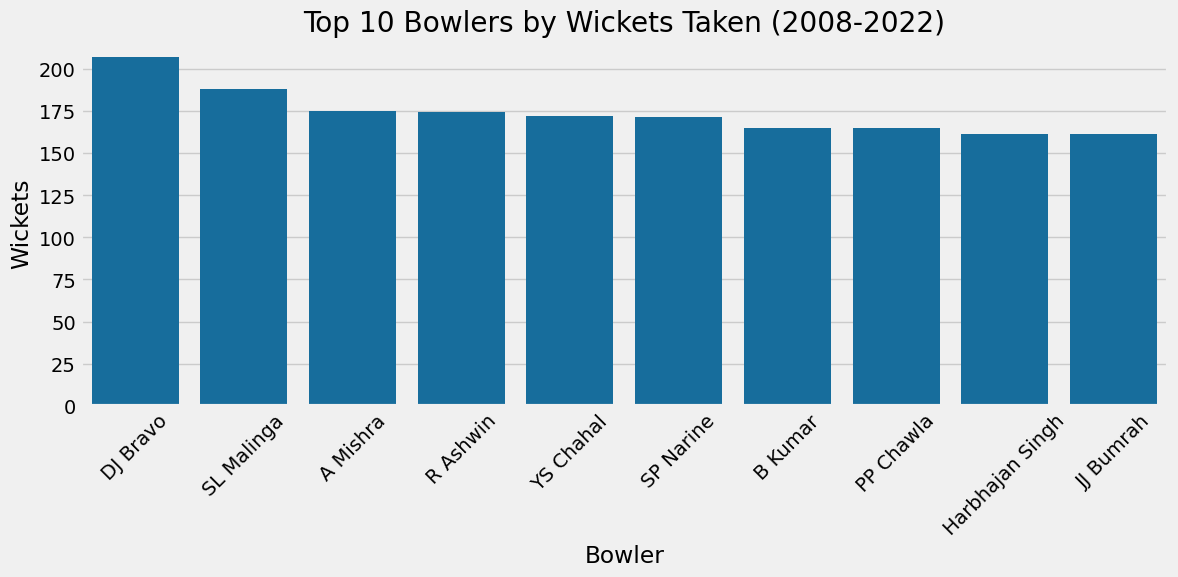

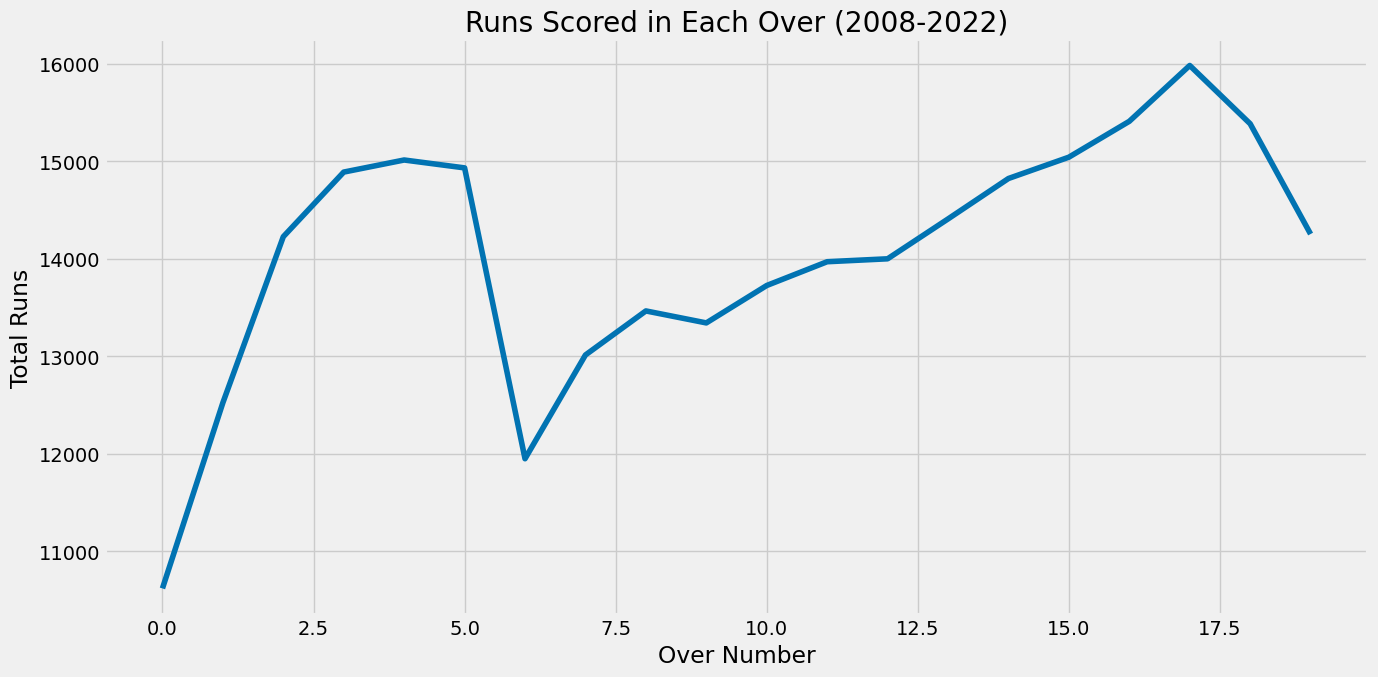

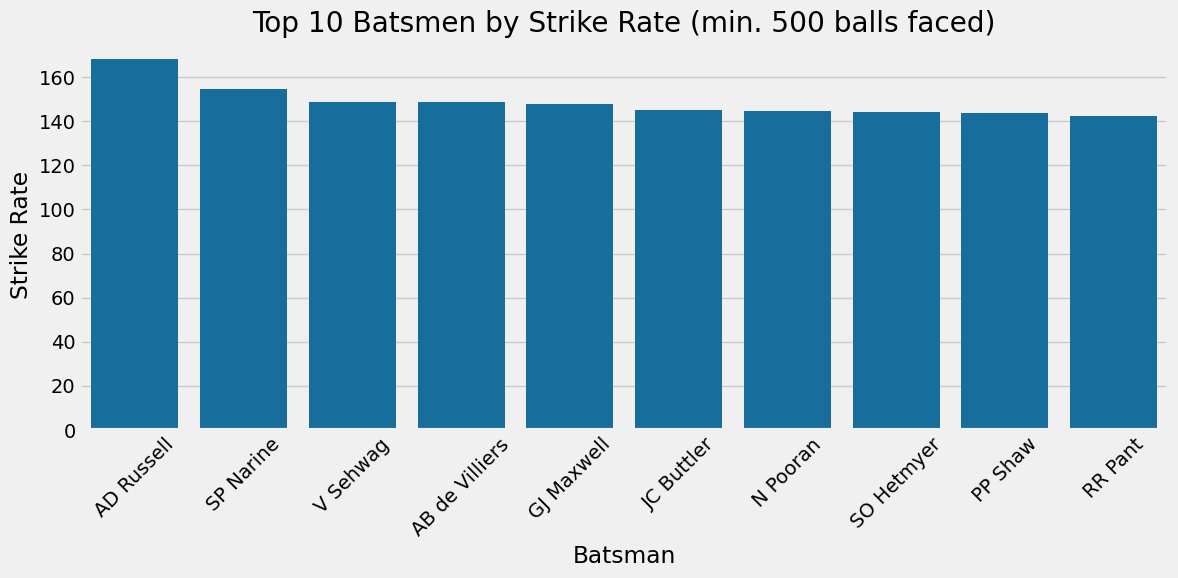

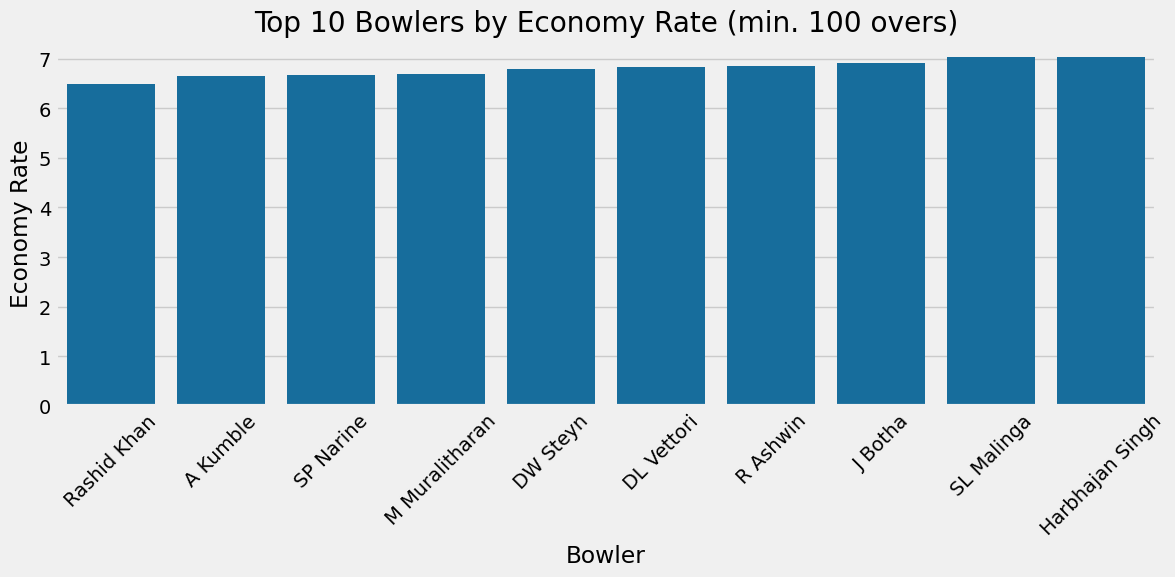

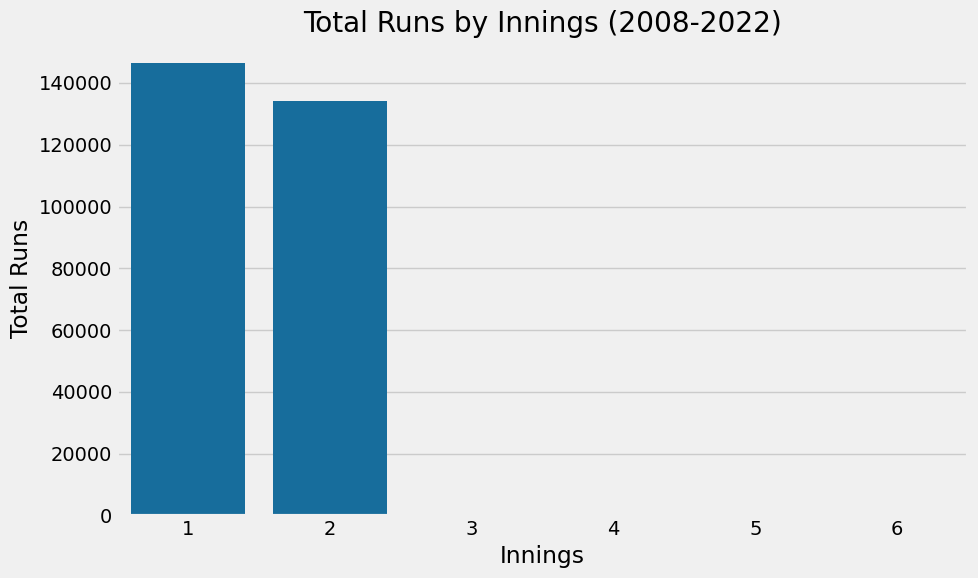

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
plt.style.use('fivethirtyeight')
sns.set_palette("colorblind")

# Load the dataset
df = pd.read_csv('IPL Dataset 2008-2022.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows of the dataset:")
print(df.head())

print("\nColumn information:")
print(df.info())

print("\nSummary statistics for numerical columns:")
print(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Basic analysis

# 1. Top Batsmen by Runs Scored
batsmen_runs = df.groupby('batter')['batsman_run'].sum().sort_values(ascending=False)
top_batsmen = batsmen_runs.head(10).reset_index()
print("\nTop 10 Batsmen by Total Runs:")
print(top_batsmen)

# 2. Top Bowlers by Wickets Taken
# Filter rows where a wicket was taken (player_out is not NA)
wicket_data = df[df['player_out'].notna()]
bowler_wickets = wicket_data.groupby('bowler').size().sort_values(ascending=False)
top_bowlers = bowler_wickets.head(10).reset_index()
top_bowlers.columns = ['bowler', 'wickets']
print("\nTop 10 Bowlers by Wickets Taken:")
print(top_bowlers)

# 3. Teams with most boundaries (4s and 6s)
# For 4s
if 'is_four' in df.columns:
    fours_by_team = df[df['is_four'] == 1].groupby('batting_team').size().sort_values(ascending=False)
    print("\nTeams with most boundaries (4s):")
    print(fours_by_team)

# For 6s
if 'is_six' in df.columns:
    sixes_by_team = df[df['is_six'] == 1].groupby('batting_team').size().sort_values(ascending=False)
    print("\nTeams with most boundaries (6s):")
    print(sixes_by_team)

# 4. Analyze run distribution by over
runs_by_over = df.groupby('overs')['batsman_run'].sum()
print("\nRun distribution by over:")
print(runs_by_over)

# 5. Extra runs conceded by bowlers
extra_runs = df[df['extras_run'] > 0].groupby('bowler')['extras_run'].sum().sort_values(ascending=False)
top_extra_conceding_bowlers = extra_runs.head(10).reset_index()
print("\nTop 10 Bowlers conceding most extras:")
print(top_extra_conceding_bowlers)

# 6. Analysis of dismissal types
if 'wicket_type' in df.columns:
    dismissal_types = df[df['wicket_type'].notna()]['wicket_type'].value_counts()
    print("\nDismissal types distribution:")
    print(dismissal_types)

# Visualizations

# 1. Top 10 Batsmen
plt.figure(figsize=(12, 6))
sns.barplot(x='batter', y='batsman_run', data=top_batsmen)
plt.title('Top 10 Batsmen by Total Runs (2008-2022)')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_batsmen.png')

# 2. Top 10 Bowlers
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='wickets', data=top_bowlers)
plt.title('Top 10 Bowlers by Wickets Taken (2008-2022)')
plt.xlabel('Bowler')
plt.ylabel('Wickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_bowlers.png')

# 3. Runs scored in each over (overall trend)
plt.figure(figsize=(14, 7))
sns.lineplot(x=runs_by_over.index, y=runs_by_over.values)
plt.title('Runs Scored in Each Over (2008-2022)')
plt.xlabel('Over Number')
plt.ylabel('Total Runs')
plt.grid(True)
plt.tight_layout()
plt.savefig('runs_by_over.png')

# 4. Strike Rates of Top Batsmen
# Calculate strike rate (runs per 100 balls faced)
batsmen_balls = df.groupby('batter').size()
batsmen_runs = df.groupby('batter')['batsman_run'].sum()
strike_rates = (batsmen_runs / batsmen_balls) * 100

# Filter for top batsmen (with at least 500 balls faced)
top_sr_batsmen = strike_rates[batsmen_balls >= 500].sort_values(ascending=False).head(10)
top_sr_df = pd.DataFrame({'batter': top_sr_batsmen.index, 'strike_rate': top_sr_batsmen.values})

plt.figure(figsize=(12, 6))
sns.barplot(x='batter', y='strike_rate', data=top_sr_df)
plt.title('Top 10 Batsmen by Strike Rate (min. 500 balls faced)')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_strike_rates.png')

# 5. Economy Rates of Top Bowlers
# Calculate economy rate (runs conceded per over)
bowler_runs = df.groupby('bowler')['batsman_run'].sum() + df.groupby('bowler')['extras_run'].sum()
bowler_balls = df.groupby('bowler').size()
bowler_overs = bowler_balls / 6  # Approximate number of overs
economy_rates = bowler_runs / bowler_overs

# Filter for bowlers who have bowled at least 100 overs
economy_top = economy_rates[bowler_overs >= 100].sort_values().head(10)
economy_df = pd.DataFrame({'bowler': economy_top.index, 'economy_rate': economy_top.values})

plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='economy_rate', data=economy_df)
plt.title('Top 10 Bowlers by Economy Rate (min. 100 overs)')
plt.xlabel('Bowler')
plt.ylabel('Economy Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_economy_rates.png')

# 6. Performance by innings
runs_by_innings = df.groupby('innings')['batsman_run'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=runs_by_innings.index, y=runs_by_innings.values)
plt.title('Total Runs by Innings (2008-2022)')
plt.xlabel('Innings')
plt.ylabel('Total Runs')
plt.tight_layout()
plt.savefig('runs_by_innings.png')

# 7. Boundary Analysis
# Analyze where in the innings most boundaries are hit
if 'is_four' in df.columns and 'is_six' in df.columns:
    # Group by over and get sum of fours and sixes
    fours_by_over = df[df['is_four'] == 1].groupby('overs').size()
    sixes_by_over = df[df['is_six'] == 1].groupby('overs').size()
    
    plt.figure(figsize=(14, 7))
    plt.plot(fours_by_over.index, fours_by_over.values, label='Fours', marker='o')
    plt.plot(sixes_by_over.index, sixes_by_over.values, label='Sixes', marker='x')
    plt.title('Boundaries Hit in Each Over (2008-2022)')
    plt.xlabel('Over Number')
    plt.ylabel('Number of Boundaries')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('boundaries_by_over.png')

# 8. Advanced Analysis: Batting Partnerships
# Aggregate runs scored by batting pairs
partnerships = df.groupby(['batter', 'non-striker'])['batsman_run'].sum().reset_index()
top_partnerships = partnerships.sort_values(by='batsman_run', ascending=False).head(10)
print("\nTop 10 Batting Partnerships:")
print(top_partnerships)

# 9. Bowler vs Batsman Analysis
# Find the most interesting bowler-batsman duels
bowler_batsman = df.groupby(['bowler', 'batter'])['batsman_run'].sum().reset_index()
bowler_batsman_wickets = wicket_data.groupby(['bowler', 'batter']).size().reset_index()
bowler_batsman_wickets.columns = ['bowler', 'batter', 'wickets']

# Merge runs and wickets data
duels = pd.merge(bowler_batsman, bowler_batsman_wickets, on=['bowler', 'batter'], how='left')
duels['wickets'] = duels['wickets'].fillna(0)

# Filter for meaningful duels (at least 30 runs or 3 wickets)
interesting_duels = duels[(duels['batsman_run'] >= 30) | (duels['wickets'] >= 3)]
top_duels = interesting_duels.sort_values(by=['wickets', 'batsman_run'], ascending=[False, False]).head(15)
print("\nMost Notable Bowler-Batsman Duels:")
print(top_duels)

# Further analysis could include:
# - Performance in different match phases (powerplay, middle overs, death overs)
# - Seasonal trends
# - Venue-specific performance
# - Win/loss analysis
# - Player performance under pressure

print("\nAnalysis completed successfully!")